In [1]:
!pip3 install --user matplotlib numpy ipympl > /dev/null

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

#%matplotlib widget

In [63]:

def plot_results(result_dir, filter=""):

    hosts = os.listdir(result_dir)

    def read_data(fname):
        d = np.genfromtxt(os.path.join(result_dir, host), delimiter=",", skip_header=3)
        with open(fname) as f:
            h1 = next(f).strip().replace('"', '').split(',')
            h2 = next(f).strip().replace('"', '').split(',')

        h = []
        for i in range(len(h1)):
            if h1[i] != "":
                th = h1[i]
            h.append(f"{th}-{h2[i]}")
        return h, d
    
    fig, axs = plt.subplots(len(hosts), 1, figsize=(20,80))

    fig.suptitle(result_dir)

    for i, host in enumerate(hosts):
        axs[i].set_title(host)
        headers, data = read_data(os.path.join(result_dir, host))
        for n in range(len(headers)):
            if filter in headers[n]:
                axs[i].plot(data[:,n]/np.math.pow(2,20), label=headers[n])
        
        axs[i].grid(True)

    fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.15) 
    axs.flatten()[-1].legend(loc="upper center", bbox_to_anchor=(0.5,-0.15), ncol=8)
    plt.show()

def plot_aggregate(result_dir):
    hosts = os.listdir(result_dir)

    def read_data(fname):
        d = np.genfromtxt(os.path.join(result_dir, host), delimiter=",", skip_header=3)
        with open(fname) as f:
            h1 = next(f).strip().replace('"', '').split(',')
            h2 = next(f).strip().replace('"', '').split(',')

        h = []
        for i in range(len(h1)):
            if h1[i] != "":
                th = h1[i]
            h.append(f"{th}-{h2[i]}")
        return h, d
    
    separate_data = []
    min_len=9999999
    for host in hosts:
        headers, data = read_data(os.path.join(result_dir, host))
        min_len = min(len(data), min_len)
        separate_data.append(data)
    
    eth0_data = np.zeros(shape=(min_len, 2))
    disk_data = np.zeros(shape=(min_len, 2))
    data = np.zeros(shape=(min_len, len(headers)))
    
    for i, d in enumerate(separate_data):
        eth0_data[:,0] += d[:min_len,0]
        eth0_data[:,1] += d[:min_len,1]
        disk_data[:,0] += d[:min_len,4::2].sum(axis=1)
        disk_data[:,1] += d[:min_len,5::2].sum(axis=1)

    fig, axs = plt.subplots(2, 1, figsize=(20,16))

    fig.suptitle(result_dir)

    axs[0].plot(eth0_data[:,0]/np.math.pow(2,20), label="net recv")
    axs[0].plot(eth0_data[:,1]/np.math.pow(2,20), label="net send")
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(disk_data[:,0]/np.math.pow(2,20), label="disk read")
    axs[1].plot(disk_data[:,1]/np.math.pow(2,20), label="disk write")
    axs[1].legend()
    axs[1].grid(True)
    
    plt.show()


['net/eth0-recv', 'net/eth0-send', 'net/eth1-recv', 'net/eth1-send', 'dsk/nvme0n1-read', 'dsk/nvme0n1-writ', 'dsk/nvme1n1-read', 'dsk/nvme1n1-writ', 'dsk/nvme2n1-read', 'dsk/nvme2n1-writ', 'dsk/nvme3n1-read', 'dsk/nvme3n1-writ', 'dsk/nvme4n1-read', 'dsk/nvme4n1-writ', 'dsk/nvme5n1-read', 'dsk/nvme5n1-writ']


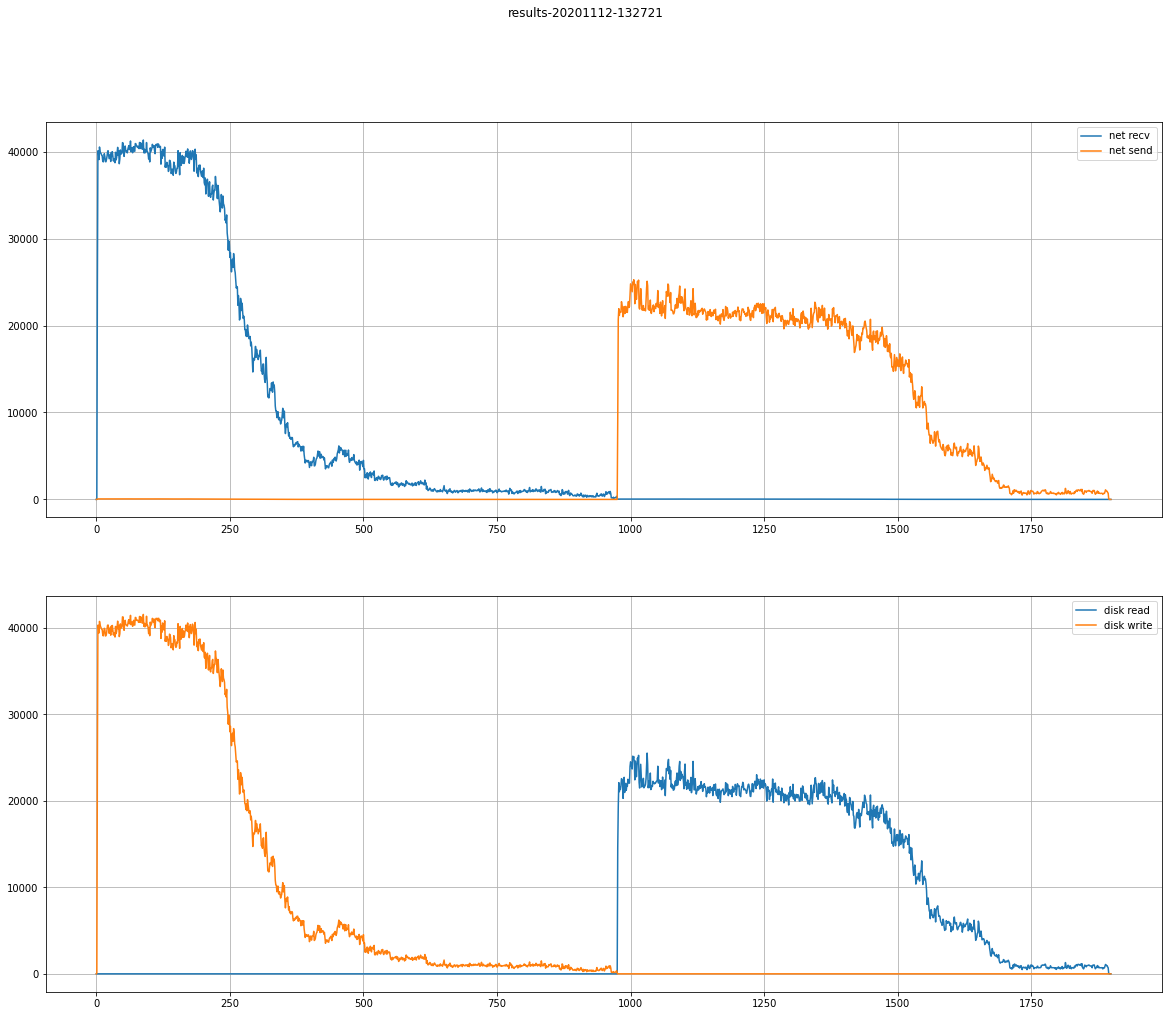

In [65]:
data = "results-prem-4-nodes-separate"
data = "results-20201112-132721"

plot_aggregate(data)